### Essential Pandas for Machine Learning¶


#### Agenda


1. Introduction to Pandas
2. Understanding Series & DataFrames
3. Loading CSV,JSON
4. Connecting databases
5. Descriptive Statistics
6. Accessing subsets of data - Rows, Columns, Filters
7. Handling Missing Data
8. Dropping rows & columns
9. Handling Duplicates
10. Function Application - map, apply, groupby, rolling, str
11. Merge, Join & Concatenate
12. Pivot-tables
13. Normalizing JSON

### 1. Introduction to Pandas

1. High performance and easy-to-open source library for data analysis
2. create a tabular source format from the files like.csv, json, database
3. Have a utilities for aggregation and discriptive statistics and handling ,missing values
4. Data base utilities like merge and join are available
5. Fast , Programmable and easy aalternative to spreed  sheets

In [1]:
import pandas as pd 
import numpy as np

### Understanding the series and DataFrame

1. Series represents the one column
2. will combine all the columns to form a table(i.e is DataFrame)


In [2]:
ser1 = pd.Series(data = [2,3,4,5,5], index = list("abcde"))
ser1

a    2
b    3
c    4
d    5
e    5
dtype: int64

In [3]:
ser2 = pd.Series(data = [11,22,33,44], index = list("abcd"))

1. Creating the dataframe from above two series frame 
2. Data belonging to same index belongs to same row

In [4]:
data1 = pd.DataFrame({'A':ser1, 'B':ser2})

In [5]:
data1.fillna("10", axis =0)

,A,B
a,2,11
b,3,22
c,4,33
d,5,44
e,5,10


Creating the random dataframe of size 10*10

In [6]:
data = np.random.randint(1,10, size = (10,10))
data

array([[8, 8, 5, 8, 9, 2, 6, 8, 4, 6],
       [8, 2, 9, 6, 4, 9, 5, 3, 6, 4],
       [6, 5, 1, 3, 5, 1, 4, 1, 2, 3],
       [4, 4, 4, 5, 4, 3, 4, 2, 4, 5],
       [7, 8, 1, 2, 4, 4, 9, 9, 4, 8],
       [2, 6, 8, 5, 7, 3, 5, 1, 5, 6],
       [2, 6, 4, 9, 1, 5, 2, 9, 2, 9],
       [2, 5, 3, 5, 3, 2, 7, 9, 3, 6],
       [7, 7, 1, 5, 9, 7, 4, 9, 9, 3],
       [4, 7, 1, 8, 5, 4, 9, 7, 3, 5]])

In [7]:
random = pd.DataFrame(data=(np.random.randint(1,10,size=(10,10))), index = list('abcdefghij'), columns = list('ABCDEFGHIJ'))
random

,A,B,C,D,E,F,G,H,I,J
a,6,6,1,7,5,1,4,1,2,4
b,5,1,1,3,5,2,7,1,1,7
c,7,1,5,8,8,3,1,2,6,7
d,8,1,2,5,4,2,8,8,7,3
e,4,4,3,4,5,2,7,7,5,4
f,4,7,5,9,5,7,6,7,6,8
g,8,3,7,3,2,2,8,5,8,3
h,2,6,1,9,4,7,5,6,7,8
i,3,7,1,5,4,7,3,7,8,7
j,2,8,9,2,7,3,3,1,4,9


### Loading the Csv and json files

In [8]:
hr_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')

In [9]:
hr_data.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
627,0.41,0.46,2,156,3,1,1,0,sales,low
10669,0.72,0.70,4,172,3,0,0,0,IT,medium
9831,0.64,0.81,3,209,3,0,0,0,management,low
3250,0.52,0.73,2,233,3,0,0,0,technical,medium
14773,0.40,0.57,2,160,3,0,1,0,accounting,low
5090,0.80,0.58,3,197,3,0,0,0,support,medium
6768,0.31,0.75,4,220,3,0,0,0,support,low
8330,0.51,0.54,4,166,4,1,0,0,sales,low
13689,0.57,0.78,3,134,3,0,0,0,RandD,medium
7224,0.89,0.73,3,169,3,0,0,0,support,high


In [10]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
hr_data_iti = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt',chunksize= 5000)

In [12]:
for value in hr_data_iti:
    value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
satisfaction_level       5000 non-null float64
last_evaluation          5000 non-null float64
number_project           5000 non-null int64
average_montly_hours     5000 non-null int64
time_spend_company       5000 non-null int64
Work_accident            5000 non-null int64
left                     5000 non-null int64
promotion_last_5years    5000 non-null int64
sales                    5000 non-null object
salary                   5000 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 5000 to 9999
Data columns (total 10 columns):
satisfaction_level       5000 non-null float64
last_evaluation          5000 non-null float64
number_project           5000 non-null int64
average_montly_hours     5000 non-null int64
time_spend_company       5000 non-null int64
Work_accident            5000 non-

### Missinggo is missing data visualization python module

In [13]:
import missingno as mg

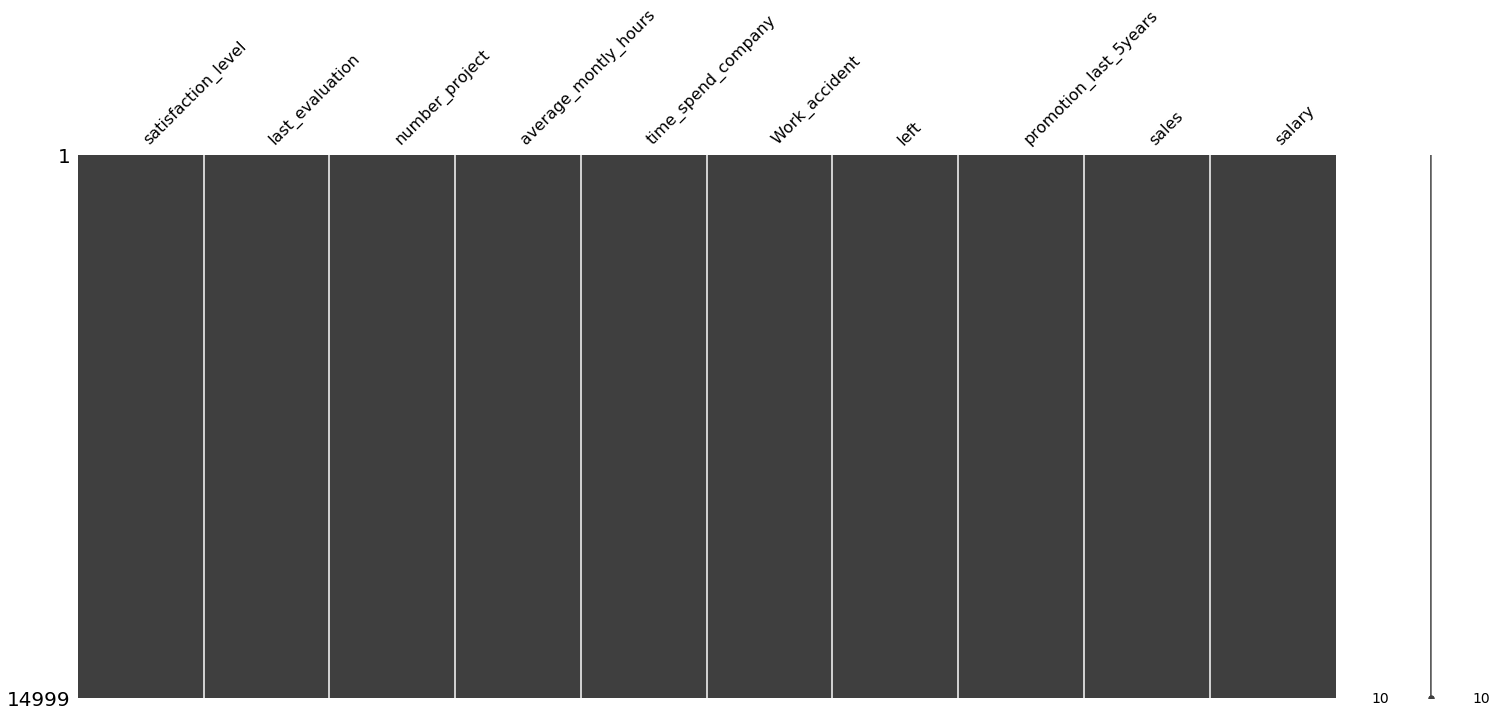

In [14]:
mg.matrix(hr_data)

In [15]:
json_file = pd.read_json('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/movie.json.txt')

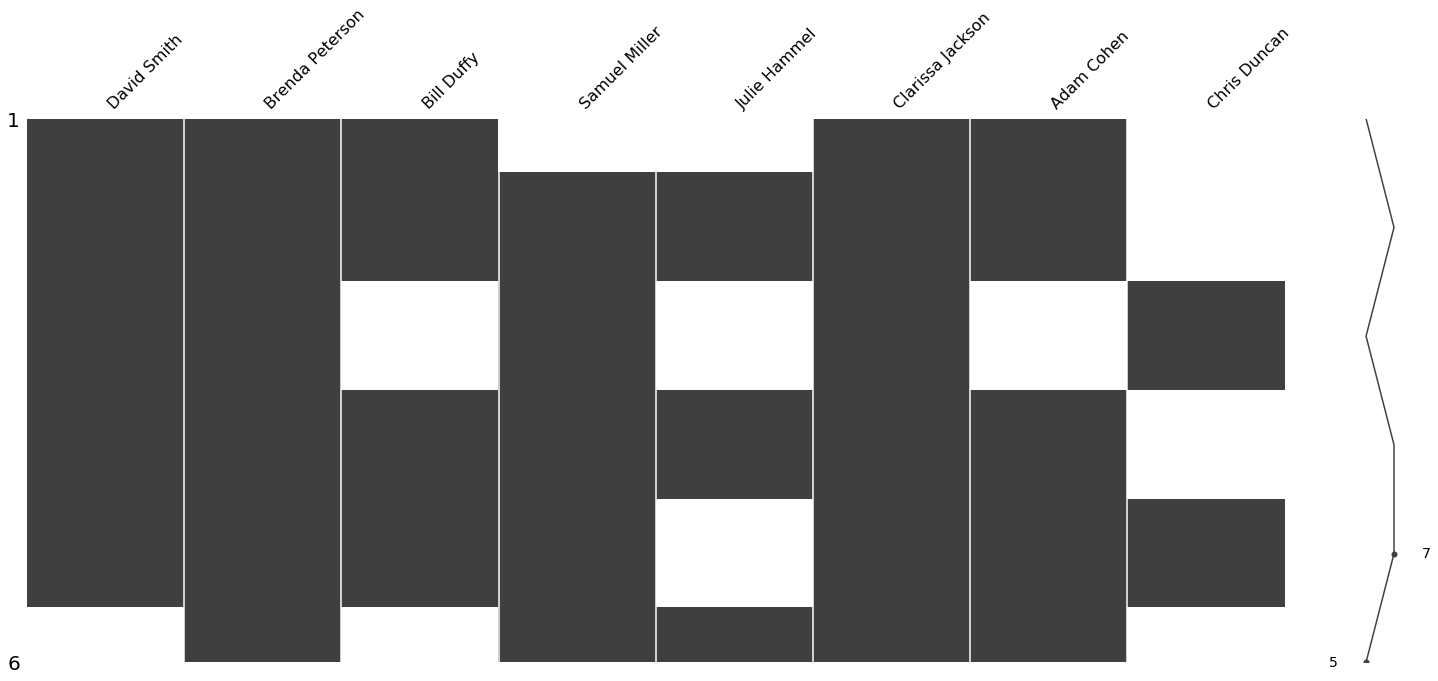

In [16]:
mg.matrix(json_file)

### 4. Connecting Databases (i.e is like MySql, MmongoDB)

In [17]:
! pip install pysqlite

  Using cached https://files.pythonhosted.org/packages/42/02/981b6703e3c83c5b25a829c6e77aad059f9481b0bbacb47e6e8ca12bd731/pysqlite-2.8.3.tar.gz


    ERROR: Command errored out with exit status 1:
     command: 'C:\ProgramData\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Windows\\TEMP\\pip-install-1737llle\\pysqlite\\setup.py'"'"'; __file__='"'"'C:\\Windows\\TEMP\\pip-install-1737llle\\pysqlite\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base pip-egg-info
         cwd: C:\Windows\TEMP\pip-install-1737llle\pysqlite\
    Complete output (1 lines):
    pysqlite is not supported on Python 3. When using Python 3, use the sqlite3 module from the standard library.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [18]:
import sqlite3 as s

In [19]:
import mysql.connector
mport MySQLdb
mysql_cn= MySQLdb.connect(host='myhost',
          port=3306,user='myusername', passwd='mypassword', 
          db='information_schema')
df_mysql = pd.read_sql('select * from VIEWS;', con=mysql_cn)


SyntaxError: invalid syntax (<ipython-input-19-9671d0b43aed>, line 2)

### Descriptive Statistics

1. Pandas api's are for understanding the data

In [ ]:
hr_data


In [ ]:
hr_data.head()

Results from the last column

In [ ]:
hr_data.tail(10)


For the information of data like columns and datatypes and no. of columns

In [ ]:
hr_data.describe()

In [ ]:
hr_data.salary.value_counts()

### 7. Accessing the subsets of data - columns, rows, filters

1. Get all the columns with categorical data 

In [ ]:
cat_col_data = hr_data.select_dtypes(include = 'O')

Validation or checking by info

In [ ]:
cat_col_data.info()

Renaming the column names

In [ ]:
hr_data.rename(columns = {'sales':'Department'}, inplace = True)

In [ ]:
hr_data.info()

select the columns by column names

In [ ]:
a = list(hr_data.columns[:3])

In [ ]:
1. Any  three columns from 

In [ ]:
hr_data[a]

In [ ]:
hr_data.satisfaction_level[:4]

In [ ]:
hr_data.satisfaction_level.value_counts()

In [ ]:
movie_data = pd.read_json('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/movie.json.txt')


In [ ]:
movie_data

1. Access the data by index

In [ ]:
movie_data.loc['Scarface']

In [ ]:
movie_data.loc['Scarface':'Goodfellas']

Accessing the data with index

In [ ]:
movie_data.iloc[1]

In [ ]:
movie_data.iloc[1:3]

In [ ]:
movie_data[1:3]

1. Filtering based on the conditions

In [ ]:
movie_data[movie_data['Adam Cohen']>4]

### 7. Handling the missing values

1. Machine learning algorithms don't accept the data missing
2.  If there is a column with 40% missing value we have to drop the whole column
3. Sometimes if the column is very important we have remove the rows which consists of null values

In [ ]:
movie_data

In [ ]:
movie_data['Bill Duffy'].isnull()

### 8. Droping the rows and columns

In [ ]:
import pandas as pd

In [ ]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/titanic-train.csv.txt')
titanic_data.sample(10)


In [ ]:
titanic_data.info()

In [ ]:
titanic_data.drop(columns = {'Cabin'}, inplace = True)

Another way for handling the missing data

In [ ]:
titanic_data.dropna().info()

another way for handling the missing values

In [ ]:
titanic_data.dropna(subset = ('Embarked', 'Age')).info()

In [ ]:
titanic_data.fillna({'Age':0, 'Embarked':'unknown'}).info()


method{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None
Method to use for filling holes in reindexed Series pad / ffill: propagate last valid observation forward to next valid backfill / bfill: use next valid observation to fill gap.

In [ ]:
titanic_data.fillna(method = 'ffill').info()

### Handling the duplicates

1. Sometimes it is very difficult to ensure that the data is not duplicate
2. This  becomes responsbility in data cleaning to make sure that duplicate data is deleted

In [ ]:
df = pd.DataFrame({'A':[1,1,3,4,5,1], 'B':[1,1,3,7,8,1], 'C':[3,1,1,6,7,1]})

In [ ]:
df

In [ ]:
df.duplicated()

In [ ]:
df[df.duplicated(subset=['A','B'])]

### 10. Function Application

1. Map for trsnforming one column to another column
2. Can be applied to only series

In [ ]:
titanic_data_age= titanic_data.Age.notnull()

In [ ]:
titanic_data.Age.value_counts()

In [ ]:
titanic_data["Age catogory"] = titanic_data.Age.map(lambda x : 'Kid' if x <2 else 'adult')

titanic_data['Age catogory'].value_counts()

#### Lambda and map functions are used to moderate the only series i.e is which has only one column

1. Apply is used for multiple columns i.e Dataframe
2. The func will recieve all the rows
3. Apply function can be done not only for Series but also for DataFrame

In [ ]:
def func(e):
    if e.Sex == 'male':
        return e.Fare*2
    else:
        return e.Fare
    

In [ ]:
titanic_data.info()

In [ ]:
titanic_data.apply(func, axis =1)


Groupby : Which splits the data into groups, a function is applied to each groups , combine  results in dataFrame
Groupby : Which splits the data into groups, a function is applied to each groups , combine results in dataFrame

In [ ]:
titanic_data.groupby('Sex').Age.median()

In [ ]:
titanic_data.groupby('Sex').Age.agg(['mean','max','min'])

Rolling for window based operation

In [ ]:
titanic_data.Age.rolling(window=5,min_periods=1).agg(['sum','min'])

In [ ]:
titanic_data